In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('Parcialdata.txt')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [15]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [16]:
df['chol'] = df['chol']/df['chol'].max()
df['chol'].head()

0    0.413121
1    0.443262
2    0.361702
3    0.418440
4    0.627660
Name: chol, dtype: float64

In [17]:
df['trestbps']=df['trestbps']/df['trestbps'].max()
df['trestbps'].head()

0    0.725
1    0.650
2    0.650
3    0.600
4    0.600
Name: trestbps, dtype: float64

In [18]:
df['thalach']=df['thalach']/df['thalach'].max()
df['thalach'].head()

0    0.742574
1    0.925743
2    0.851485
3    0.881188
4    0.806931
Name: thalach, dtype: float64

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,0.725,0.413121,1,0,0.742574,0,2.3,0,0,1,1
1,37,1,2,0.650,0.443262,0,1,0.925743,0,3.5,0,0,2,1
2,41,0,1,0.650,0.361702,0,0,0.851485,0,1.4,2,0,2,1
3,56,1,1,0.600,0.418440,0,1,0.881188,0,0.8,2,0,2,1
4,57,0,0,0.600,0.627660,0,1,0.806931,1,0.6,2,0,2,1


In [20]:
df[["age"]] = df[["age"]].astype("int64")

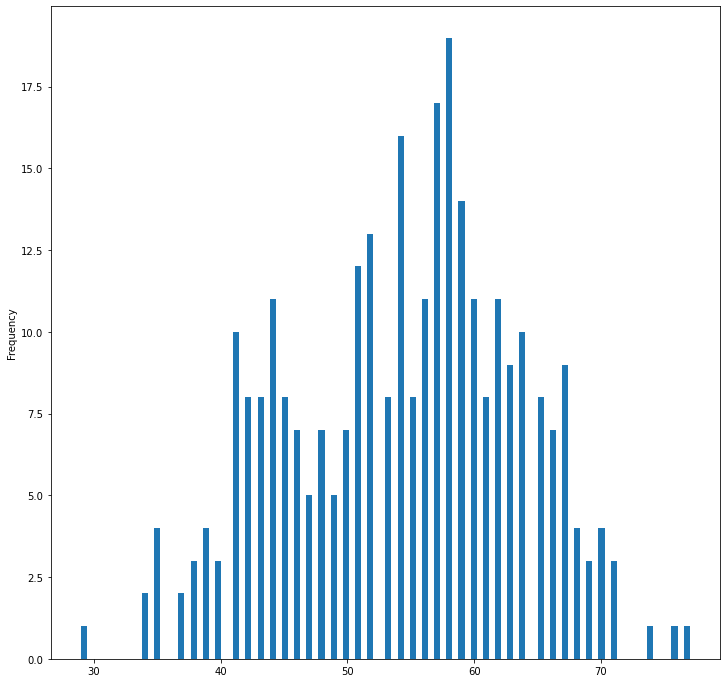

In [21]:
#
df.age.plot(kind = 'hist', bins = 100, figsize = (12,12))
plt.show()

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

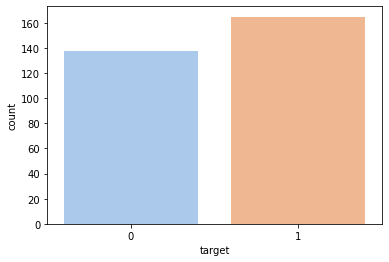

In [25]:
sn.countplot(df['target'], palette = 'pastel')  


In [27]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

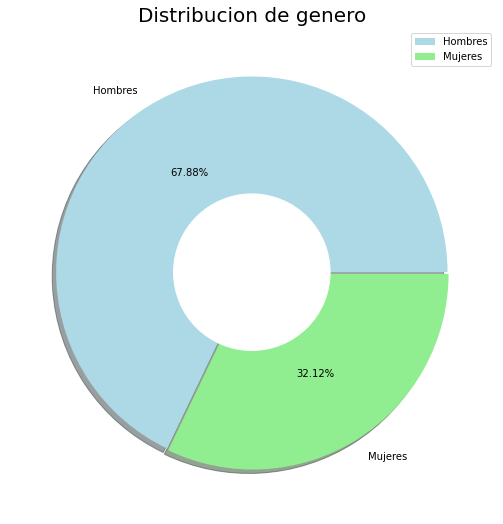

In [29]:
size = [205, 97]
colors = ['lightblue', 'lightgreen']
labels = "Hombres", "Mujeres"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.4, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribucion de genero', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [30]:
X=df.iloc[:, :-1].values
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [31]:
y = df.iloc[:,13]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [33]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [34]:
X_train

array([[-1.32773282, -1.43641607,  0.98584243, ..., -0.66169316,
        -0.70710678, -0.46472917],
       [ 1.24903178, -1.43641607,  0.98584243, ..., -0.66169316,
         0.26516504, -0.46472917],
       [ 0.35276583,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       ...,
       [ 0.12869935,  0.69617712,  1.94013791, ..., -0.66169316,
        -0.70710678,  1.14190596],
       [-0.87959984,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       [ 0.35276583,  0.69617712,  0.03154696, ..., -0.66169316,
        -0.70710678, -0.46472917]])

In [35]:
X_test

array([[ 1.69716475,  0.69617712, -0.92274852,  0.77251645, -1.36354075,
        -0.41803981,  0.90163913, -1.07375268,  1.40984195,  1.2900049 ,
        -2.27916533, -0.70710678,  1.14190596],
       [ 1.02496529,  0.69617712,  1.94013791,  2.23625729, -0.3703119 ,
        -0.41803981, -0.97936664,  0.22375805, -0.70929937, -0.38883987,
        -0.66169316, -0.70710678,  1.14190596],
       [ 0.46479907,  0.69617712,  1.94013791,  2.23625729,  0.7728383 ,
        -0.41803981, -0.97936664,  0.39675948, -0.70929937, -0.72460883,
        -0.66169316, -0.70710678,  1.14190596],
       [ 0.57683232,  0.69617712, -0.92274852, -0.39847623,  0.21063328,
        -0.41803981, -0.97936664, -0.38174696,  1.40984195,  1.45788938,
        -0.66169316,  0.26516504,  1.14190596],
       [ 0.8008988 ,  0.69617712,  0.98584243, -0.10572806, -0.29535123,
        -0.41803981,  0.90163913, -0.16549517, -0.70929937,  0.61846699,
        -0.66169316,  2.20970869,  1.14190596],
       [-0.7675666 ,  0.696177

In [36]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [37]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)

In [41]:
prediction = neigh.predict(X_test)

In [42]:
prediction1=pd.DataFrame(prediction)
prediction1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [43]:
from sklearn import metrics
metrics.accuracy_score(y_test, prediction)

0.8524590163934426

In [45]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [46]:
y_pred=classifier.predict(X_test)

In [47]:
prediction2=pd.DataFrame(y_pred)
prediction2.head()

,0
0,0
1,1
2,1
3,0
4,0


In [48]:
metrics.accuracy_score(y_test, prediction2)

0.8688524590163934

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction1)

array([[23,  4],
       [ 5, 29]])

In [50]:
confusion_matrix(y_test,prediction2)

array([[21,  6],
       [ 2, 32]])

In [51]:
from sklearn.tree import DecisionTreeClassifier
HeartTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [52]:
HeartTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [53]:
y_pred = HeartTree.predict(X_test)

In [54]:
prediction3=pd.DataFrame(y_pred)
prediction3.head()

,0
0,0
1,0
2,0
3,0
4,0


In [55]:
metrics.accuracy_score(y_test,prediction3)

0.7540983606557377

In [56]:
confusion_matrix(y_test,prediction3)

array([[22,  5],
       [10, 24]])